In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/transactions_with_all_flags_final.csv.csv')

In [3]:
selected_features = [
    'TransactionAmount', 'TransactionDuration', 'LoginAttempts',
    'AccountBalance', 'time_diff', 'amount_to_balance_ratio',
    'amount_exceeds_balance', 'suspicious_merchant_flag',
    'high_amount_flag', 'many_login_attempts_flag', 'flag_zscore_LoginAttempts',
    'isolation_outlier_label'
]
X = df[selected_features]
y = df['final_anomaly_flag']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       237

    accuracy                           1.00       628
   macro avg       1.00      1.00      1.00       628
weighted avg       1.00      1.00      1.00       628



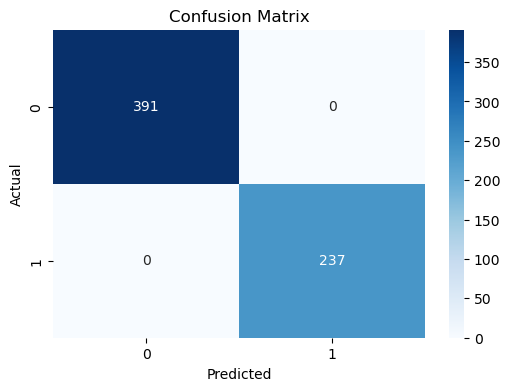

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

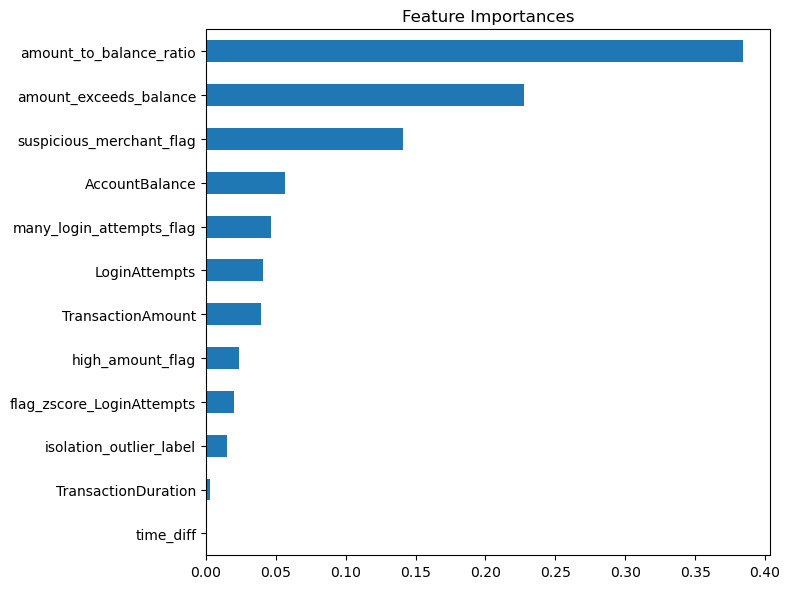

In [8]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [9]:
pd.set_option('display.max_rows', None)

In [12]:
df_anomalies_only = df[df['final_anomaly_flag'] == 1]

In [13]:
df_anomalies_only.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,flag_zscore_TransactionDuration,flag_zscore_LoginAttempts,flag_zscore_AccountBalance,flag_zscore_time_diff,flag_zscore_Hour,flag_zscore_Day,flag_zscore_amount_to_balance_ratio,isolation_pred,isolation_outlier_label,final_anomaly_flag
4,2157,153,0.107846,2024-11-04 08:06:23,1,8,586,340,27,2,...,0,0,0,0,0,0,0,1,0,1
6,2423,336,0.172916,2024-11-04 08:06:23,1,39,353,582,85,0,...,0,1,0,0,0,0,0,-1,1,1
7,1249,378,0.133434,2024-11-04 08:06:23,1,27,97,91,65,2,...,0,0,0,0,0,0,0,1,0,1
9,2114,422,0.482721,2024-11-04 08:06:24,1,25,285,134,63,0,...,0,0,0,0,0,0,0,1,0,1
10,707,437,0.109540,2024-11-04 08:06:24,1,19,530,123,10,0,...,0,0,0,0,0,0,0,1,0,1
12,1087,326,0.201532,2024-11-04 08:06:24,1,33,312,23,97,1,...,0,0,0,0,0,0,0,1,0,1
13,1558,475,0.343378,2024-11-04 08:06:24,1,4,197,528,13,0,...,0,0,0,0,0,0,0,1,0,1
15,256,71,0.097110,2024-11-04 08:06:24,1,42,147,459,36,2,...,0,0,0,0,0,0,0,1,0,1
21,709,457,0.051854,2024-11-04 08:06:26,1,34,484,411,38,1,...,0,0,0,0,0,0,0,-1,1,1
25,494,492,0.343794,2024-11-04 08:06:26,1,11,645,581,43,2,...,0,0,0,0,0,0,0,1,0,1


In [17]:
df_anomalies_only.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'time_diff', 'location_change', 'Hour', 'Day', 'DayOfWeek',
       'high_amount_flag', 'many_login_attempts_flag', 'long_time_diff_flag',
       'amount_to_balance_ratio', 'amount_exceeds_balance',
       'suspicious_merchant_flag', 'reactivation_suspect_flag',
       'duration_suspicious_flag', 'age_balance_anomaly_flag',
       'strong_anomaly_label', 'zscore_TransactionAmount',
       'zscore_TransactionDuration', 'zscore_LoginAttempts',
       'zscore_AccountBalance', 'zscore_time_diff', 'zscore_Hour',
       'zscore_Day', 'zscore_amount_to_balance_ratio',
       'flag_zscore_TransactionAmount', 'flag_zscore_TransactionDuration',
       'flag_zscore_LoginAttempts', 'flag_zscore_

In [18]:
df_anomalies_only = df.drop(columns=['zscore_TransactionAmount',
                                    'zscore_TransactionDuration', 'zscore_LoginAttempts',
                                    'zscore_AccountBalance', 'zscore_time_diff', 'zscore_Hour',
                                    'zscore_Day', 'zscore_amount_to_balance_ratio',
                                    'flag_zscore_TransactionAmount', 'flag_zscore_TransactionDuration',
                                    'flag_zscore_LoginAttempts', 'flag_zscore_AccountBalance',
                                    'flag_zscore_time_diff', 'flag_zscore_Hour', 'flag_zscore_Day',
                                    'flag_zscore_amount_to_balance_ratio', 'isolation_pred',
                                    'isolation_outlier_label','reactivation_suspect_flag',
                                    'duration_suspicious_flag', 'age_balance_anomaly_flag', 
                                    'long_time_diff_flag',
                                    ]
                            )

In [19]:
df_anomalies_only.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,Hour,Day,DayOfWeek,high_amount_flag,many_login_attempts_flag,amount_to_balance_ratio,amount_exceeds_balance,suspicious_merchant_flag,strong_anomaly_label,final_anomaly_flag
0,469,34,0.037361,2024-11-04 08:06:23,0,29,395,188,99,2,...,8,4,0,0,0,0.060637,0,0,0,0
1,2044,237,0.098158,2024-11-04 08:06:23,1,4,436,24,82,2,...,8,4,0,0,0,0.206647,0,0,0,0
2,1252,455,0.197660,2024-11-04 08:06:23,0,16,648,25,39,1,...,8,4,0,0,0,0.235796,0,0,0,0
3,35,263,0.064883,2024-11-04 08:06:23,1,39,41,479,1,1,...,8,4,0,0,0,0.170428,0,0,0,0
4,2157,153,0.107846,2024-11-04 08:06:23,1,8,586,340,27,2,...,8,4,0,0,0,0.200754,0,1,1,1
5,2107,188,0.024150,2024-11-04 08:06:23,1,11,28,135,59,2,...,8,4,0,0,0,0.245774,0,0,0,0
6,2423,336,0.172916,2024-11-04 08:06:23,1,39,353,582,85,0,...,8,4,0,0,1,0.219389,0,0,1,1
7,1249,378,0.133434,2024-11-04 08:06:23,1,27,97,91,65,2,...,8,4,0,0,0,0.483932,0,1,1,1
8,1913,286,0.021716,2024-11-04 08:06:24,1,14,582,334,54,0,...,8,4,0,0,0,0.064870,0,0,0,0
9,2114,422,0.482721,2024-11-04 08:06:24,1,25,285,134,63,0,...,8,4,0,1,0,2.378710,1,0,1,1


In [20]:
df_anomalies_only.to_csv('../anomalies.csv', index=False) 